[Keras](https://keras.io/) is a high-level neural network Python library, designed to sit on top of lower level implementations such as [TensorFlow](https://www.tensorflow.org/).

It provides abstractions that enable you to quickly create neural network structures.  Here I'm going to try to create a simple 3 layer network, and use it to solve a basic classification problem.

For reference, the problem I'm trying to solve, and the network I'm using to solve it, are roughly equivalent to [this interactive example  at playground.tensorflow.org](http://playground.tensorflow.org/#activation=relu&regularization=L1&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.003&regularizationRate=0.001&noise=0&networkShape=4,1&seed=0.92802&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


**Tell Jupyter to display matlplotlib plots directly in the notebook**

In [1]:
%matplotlib inline

### Imports

A lot of machine learning work ends up being about 'housekeeping' - finding, filtering, parsing, loading data, transforming it into a usable shape, and so on.  The [Pandas](http://pandas.pydata.org/) library is excellent for this type of work

In [9]:
import pandas as pd

Numpy is commonly used for creating and managing arrays of numbers and performing a wide variety of mathematical operations on them.  Matplotlib and seaborn provide a number of useful plotting functions.

In [10]:
import numpy as np
import matplotlib.pyplot as pl

In [11]:
import seaborn
seaborn.set()

TensorFlow is Google's Machine Learning library

In [12]:
import tensorflow as tf

This is a useful function for splitting data sets into training and testing subsets.

In [13]:
from sklearn.model_selection import train_test_split

And finally Keras is the library I actually want to explore.  My understanding is that it provides a high-level abstraction to common TensorFlow operations

In [14]:
import keras
from keras.layers import Dense, Activation

# Create training data.

I'm going to create an array of data with two features, *x1* and *x2*

In [33]:
data = pd.DataFrame(np.random.random((1500,2))*20 - 10,columns=['x1','x2'])

For simpler visualisation, I'm going to filter out values that lie very close to the axes.

In [34]:
data= data[(np.abs(data.x1)>1)& (np.abs(data.x2)>1)][0:1000]

And then for each `(x1,x2)` pair, I'm going to assign a value *y* that is true if `x*y` is greater than 0.

In [35]:
data['y']=((data.x1*data.x2)>0)

In [36]:
data.head()

,x1,x2,y
0,-4.131299,-2.266670,True
1,9.359900,-3.169526,False
2,-5.079496,-7.030525,True
3,8.475884,-4.005687,False
5,5.072955,-3.757722,False


## Visualize the input data

Seaborn provides a [function](http://seaborn.pydata.org/generated/seaborn.lmplot.html) that gives me exactly the visualization that I want:

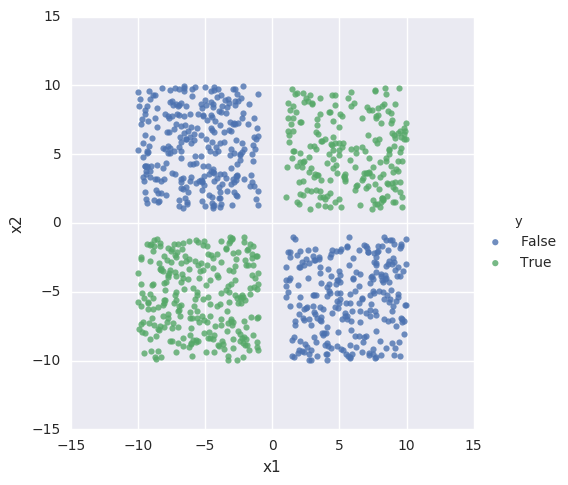

In [37]:
seaborn.lmplot(x="x1", y="x2", hue="y", data=data,fit_reg=False)

So we have two classes, and we're going to see if we can create a neural network that can distinguish between the two.

## Create training data and test data

We assign 80% of the data to the training set, with the remaining 20% left over for testing the accuracy of our hypothesis.

In [38]:
train,test=train_test_split(data,train_size=0.8)

In [41]:
len(train), len(test)

(800, 200)

Keras seems to require input data in the form of Numpy arrays, so we extract those from our Pandas dataframe:

In [57]:
X_train = train[['x1','x2']].values
Y_train = train['y'].values

## Define a neural network

Now we can use Keras to define our network. I'm going to specify a network with an input layer, an output layer, and a 4-node hidden layer.

In [71]:
model=keras.models.Sequential()

model.add(Dense(output_dim=4, input_dim=2,activation='tanh'))
model.add(Dense(output_dim=2,  activation='tanh'))
model.add(Dense(output_dim=1,  activation='tanh'))


## Train the network

This is the bit that would take considerably more lines of code in a lower-level library.  I can tweak parameters such as the cost function, the optimizer and so on. Here I choose a mean-squared-error cost function and a stochastic gradient descent optimizer.

I haven't yet figured out how to change the learning rate, which would be very helpful to know.

In [72]:
%%time
model.compile(loss='mean_squared_error', optimizer='sgd')

model.fit(X_train,
          Y_train,
          nb_epoch=250,
          batch_size=40,
          verbose=0)


CPU times: user 3.26 s, sys: 40 ms, total: 3.3 s
Wall time: 3.34 s


## Having trained the network, check it against the test data.

`plotPrediction` runs the `predict_classes` method to attempt to classify the test data we provide, and then displays its guesses:

In [75]:
def plotPrediction(data,model):
    X = data.ix[:,:-1].values
    Y = data['y'].values
    
    d=data.copy()
    d['pred']=model.predict_classes(X,verbose=0).reshape(len(X))
    
    matches = (d['pred']==Y)
    accuracy = 100* matches.sum()/matches.count()

    print("Accuracy: {}%".format(accuracy))        #I'd rather compute an F-Score here.
    
    seaborn.lmplot(x="x1", y="x2", hue="pred", data=d,fit_reg=False)

Accuracy: 91.5%


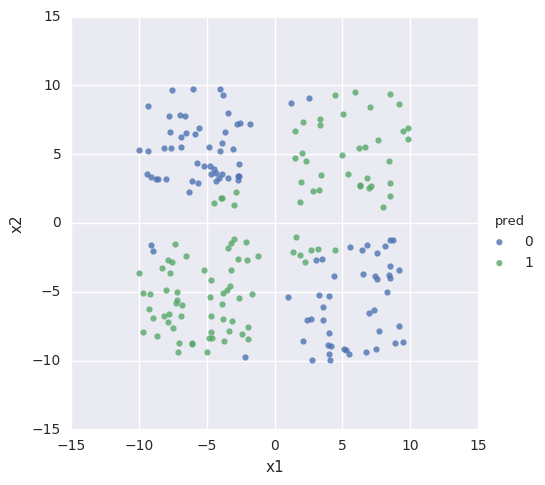

In [76]:

plotPrediction(test,model)

## Conclusion

So we see that after 250 training cycles, the network can mostly correctly identify input data.

Because the network is initialized with random data at the beginning of every run, sometimes I get better results than this and sometimes worse.  And Keras gives me many ways of quickly tweaking my algorithm - I can adjust the number of nodes in each layer, the number of layers, the activation function, the cost function, the number of training cycles, the test/training split and so on.  

Next I'd like to figure out how to adjust regularization parameters and the learning rate, and explore how that affects the efficiency of the network.